# Data Diri

*   Nama : Dimyati
*   Email : dimyati197@gmail.com
*   Link Dataset : https://www.kaggle.com/datasets/madisona/translated-animals10

# Mengimpor Library

In [1]:
#Impor beberapa modul Python yang dibutuhkan
import zipfile,os,glob, warnings

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np, matplotlib.pyplot as plt, matplotlib.image as mpimg
%matplotlib inline

# Mempersiapkan Dataset

In [2]:
#menginstall kaggle
!pip install -q kaggle

In [3]:
#mengatur hak akses file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
#unduh dataset
!kaggle datasets download -d madisona/translated-animals10

100% 585M/586M [00:29<00:00, 24.7MB/s]
100% 586M/586M [00:29<00:00, 20.6MB/s]


# Mengekstraksi Dataset

In [5]:
#Ekstraksi file zip dari dataset yang dipersiapkan
!mkdir translated-animals10.zip
!unzip translated-animals10.zip -d translated-animals10
!ls translated-animals10

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: translated-animals10/animals10/raw-img/spider/OIP-MVQChNQpHiMZEVMPehrvoAHaE6.jpeg  
  inflating: translated-animals10/animals10/raw-img/spider/OIP-MVdIFDAFpNyK_XCpwkDIWgHaFj.jpeg  
  inflating: translated-animals10/animals10/raw-img/spider/OIP-MYY_8k5AHqMJwTCNXfH6rwHaFj.jpeg  
  inflating: translated-animals10/animals10/raw-img/spider/OIP-MZEVXuoMsATG8u_UuTQ6hAHaE8.jpeg  
  inflating: translated-animals10/animals10/raw-img/spider/OIP-MZg0tznDRE95AMfyuutuYAHaE6.jpeg  
  inflating: translated-animals10/animals10/raw-img/spider/OIP-M_r9DkR2X5gP0P5-z8wPYQHaE7.jpeg  
  inflating: translated-animals10/animals10/raw-img/spider/OIP-M_xDUSzjlF3-w9XHCm93cgHaFF.jpeg  
  inflating: translated-animals10/animals10/raw-img/spider/OIP-MbI4-bMyutRX3X382IAVcQAAAA.jpeg  
  inflating: translated-animals10/animals10/raw-img/spider/OIP-MbMksZdD7gomsC9fd6cpKgHaHJ.jpeg  
  inflating: translated-animals10/animals10/raw-img/spider/OIP-Md4AM

In [6]:
import shutil

ignore_animals = ['butterfly', 'cat', 'cow', 'elephant', 'horse', 'sheep', 'squirrel']

for x in ignore_animals:
  path = os.path.join(os.path.join('/content/translated-animals10/animals10/raw-img/'), x)
  shutil.rmtree(path)

In [7]:
#Atur lokasi dataset
dataset_dir = "translated-animals10/animals10/raw-img"
chicken_dir = os.path.join("translated-animals10/animals10/raw-img/chicken")
dog_dir = os.path.join("translated-animals10/animals10/raw-img/dog")
spider_dir = os.path.join("translated-animals10/animals10/raw-img/spider")


# Pemahaman Data

In [8]:
#Lihat banyaknya data yang dipergunakan
total_image = len(list(glob.iglob("translated-animals10/animals10/raw-img/*/*.*", recursive=True)))
total_chicken = len(os.listdir(chicken_dir))
total_dog = len(os.listdir(dog_dir))
total_spider = len(os.listdir(spider_dir))

print("chicken :",total_chicken) #Jumlah Gambar Chicken
print("dog :",total_dog) #Jumlah Gambar Dog
print("spider :",total_spider) #Jumlah Gambar Spider
print("All images :",total_image) #Jumlah Gambar Keseluruhan

chicken : 3098
dog : 4863
spider : 4821
All images : 12782


# Augmentasi Gambar



In [9]:
#Prepocessing menggunakan ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split = 0.2) #Toleransi validasi 20%

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    validation_split = 0.2) #Toleransi validasi 20%
 

In [10]:
#Mempersiapkan train data dan valid data dari data gen
train_gen = train_datagen.flow_from_directory(
        dataset_dir,  
        target_size=(150, 150),  #Mengubah ke dalam bentuk resolusi 150x150 pixels
        batch_size=32,
        class_mode='categorical', #Menggunakan categorical karena 3 klasifikasi masalah
        subset='training')
 
valid_gen = test_datagen.flow_from_directory(
        dataset_dir, 
        target_size=(150, 150), #Mengubah ke dalam bentuk resolusi 150x150 pixels
        batch_size=32, 
        class_mode='categorical', #Menggunakan categorical karena 3 klasifikasi masalah
        subset='validation')

Found 10227 images belonging to 3 classes.
Found 2555 images belonging to 3 classes.


# Pemodelan

In [11]:
#Penggunaan Model
_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.3), #Menggunakan Dropout
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
   tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [12]:
#Compile Model
_model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [13]:
_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

# Latih Model

In [14]:
#Penggunaan Callback
class myCallback(tf.keras.callbacks.Callback):  
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.93 and logs.get('val_accuracy')>0.93):
      print("\nAkurasi sudah mencapai atau melebihi 93%.") #Akurasi >=93%
      self.model.stop_training = True

callbacks = myCallback()

In [15]:
#Latih model
history_model = _model.fit(
      train_gen,  
      epochs=50,  #Jumlah iterasi
      validation_data=valid_gen, 
      validation_steps=5,  
      verbose=2, #Perintah menyebutkan jumlah epoch
      callbacks = [callbacks]
)

Epoch 1/50
320/320 - 75s - loss: 0.9238 - accuracy: 0.5406 - val_loss: 0.8972 - val_accuracy: 0.6187 - 75s/epoch - 235ms/step
Epoch 2/50
320/320 - 61s - loss: 0.6478 - accuracy: 0.7221 - val_loss: 0.6405 - val_accuracy: 0.7375 - 61s/epoch - 190ms/step
Epoch 3/50
320/320 - 59s - loss: 0.5320 - accuracy: 0.7837 - val_loss: 0.4162 - val_accuracy: 0.8375 - 59s/epoch - 185ms/step
Epoch 4/50
320/320 - 61s - loss: 0.4562 - accuracy: 0.8188 - val_loss: 0.5649 - val_accuracy: 0.7563 - 61s/epoch - 191ms/step
Epoch 5/50
320/320 - 60s - loss: 0.4138 - accuracy: 0.8363 - val_loss: 0.3725 - val_accuracy: 0.8687 - 60s/epoch - 187ms/step
Epoch 6/50
320/320 - 61s - loss: 0.3779 - accuracy: 0.8540 - val_loss: 0.4359 - val_accuracy: 0.8625 - 61s/epoch - 190ms/step
Epoch 7/50
320/320 - 60s - loss: 0.3529 - accuracy: 0.8625 - val_loss: 0.5630 - val_accuracy: 0.8000 - 60s/epoch - 188ms/step
Epoch 8/50
320/320 - 60s - loss: 0.3382 - accuracy: 0.8695 - val_loss: 0.2634 - val_accuracy: 0.9125 - 60s/epoch - 188

# Evaluasi Model

In [16]:
# Mengambil nilai Akurasi dan Loss
acc = history_model.history['accuracy']
val_acc = history_model.history['val_accuracy']
loss = history_model.history['loss']
val_loss = history_model.history['val_loss']

epochs = range(len(acc))

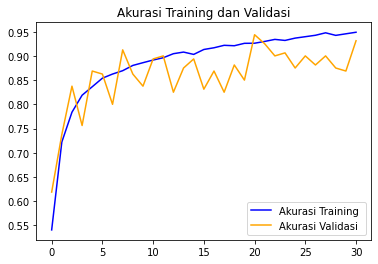

<Figure size 432x288 with 0 Axes>

In [17]:
#Plot Akurasi
plt.plot(epochs, acc, 'blue', label='Akurasi Training ') #Plot dari Akurasi Training
plt.plot(epochs, val_acc, 'orange', label='Akurasi Validasi') #Plot dari Akurasi Validasi
plt.title('Akurasi Training dan Validasi') #Judul dari Plot
plt.legend(loc=0) #garis grafik
plt.figure()                                                                      
plt.show()

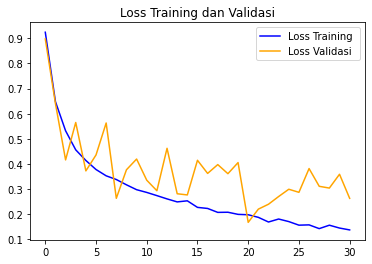

<Figure size 432x288 with 0 Axes>

In [18]:
#Plot Loss
plt.plot(epochs, loss, 'blue', label='Loss Training ')    #Plot dari Loss Training              
plt.plot(epochs, val_loss, 'orange', label='Loss Validasi') #Plot dari Loss Validasi
plt.title('Loss Training dan Validasi') #Judul dari Plot
plt.legend(loc=0) #garis grafik
plt.figure()                                                                      
plt.show()

# Deployment Model

In [19]:
import pathlib
# Saving models into SavedModel format
export_dir = 'saved_model/'
tf.saved_model.save(_model, export_dir)
 
# Convert SavedModel to vegs.tflite
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()
 
tflite_model_file = pathlib.Path('vegs.tflite')
tflite_model_file.write_bytes(tflite_model)

4982324